Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3680 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.FXBILG_3.2.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...:   0%|          | 0/3669 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.FXBILG_3.2.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/3.2.0. Subsequent calls will reuse this data.
Epoch 1/20
58/58 [==============================] - 208s 4s/step - loss: 0.0268 - accuracy: 0.5457 - val_loss: 0.0135 - val_accuracy: 0.5846
Epoch 2/20
58/58 [==============================] - 206s 4s/step - loss: 0.0114 - accuracy: 0.5847 - val_loss: 0.0112 - val_accuracy: 0.5842
Epoch 3/20
58/58 [==============================] - 204s 4s/step - loss: 0.0098 - accuracy: 0.5816 - val_loss: 0.0102 - val_accuracy: 0.5815
Epoch 4/20
58/58 [==============================] - 201s 3s/step - loss: 0.0094 - accuracy: 0.5747 - val_loss: 0.0098 - val_accuracy: 0.5829
Epoch 5/20
58/58 [==============================] - 202s 3s/step - loss: 0.0090 - accuracy: 0.5789 - val_loss: 0.0100 - val_accuracy: 0.5845
Epoch 6/20
58/58 [==============================] - 201s 3s/step - loss: 0.0087 - accuracy: 0.5786 - val_loss: 0.0093 - val_accuracy: 0.5760
Epoch 7/20
58/5

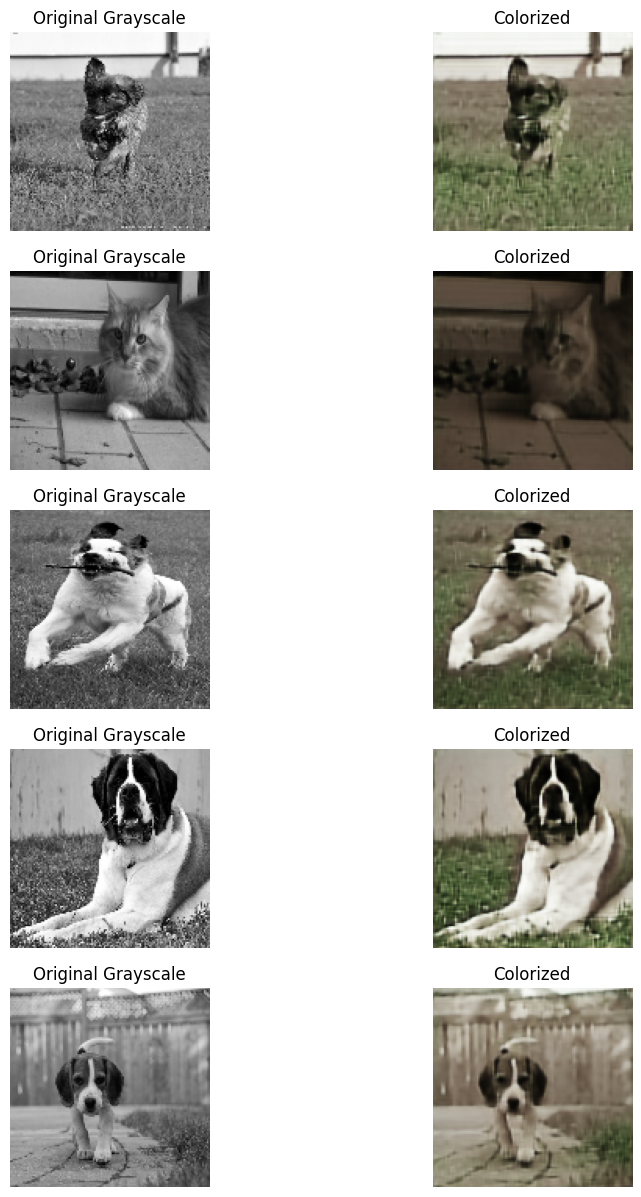

In [ ]:
# Import necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load the Oxford-IIIT Pet dataset
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Function to preprocess the images
def preprocess_image(image, label):
    image = tf.image.resize(image, (128, 128))  # Resize to 128x128
    image_gray = tf.image.rgb_to_grayscale(image) / 255.0  # Convert to grayscale and normalize
    image_color = tf.cast(image, tf.float32) / 255.0  # Normalize the color image
    return image_gray, image_color

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_image).batch(64).shuffle(1000)
test_dataset = test_dataset.map(preprocess_image).batch(64)

# Define the model with an input shape of (128, 128, 1)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
model.fit(train_dataset, epochs=20, validation_data=test_dataset)

# Function to visualize some colorized images
def display_colorized_images(model, test_dataset):
    sample_images = list(test_dataset.take(1).as_numpy_iterator())[0]
    x_test_gray, x_test_color = sample_images
    preds = model.predict(x_test_gray[:5])
    fig, axs = plt.subplots(5, 2, figsize=(10, 15))
    for i in range(5):
        axs[i, 0].imshow(.x_test_gray[i].squeeze(), cmap='gray')
        axs[i, 0].set_title("Original Grayscale")
        axs[i, 0].axis('off')
        axs[i, 1].imshow(preds[i])
        axs[i, 1].set_title("Colorized")
        axs[i, 1].axis('off')
    plt.show()

# Display colorized images
display_colorized_images(model, test_dataset)
